In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

### 데이터 구성

In [2]:
ts = pd.read_excel("C:\\Users\\user\\Desktop\\hyunhee\\learning\\text\\tselpa(크롤링).xlsx")

In [3]:
ts

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수 분야,가격,대상
0,0,수업을 살리는 체육 레시피,30시간,2024.06.13,5,오늘부터는 내가 체육 교담!!!,아이들이 정~~~말 좋아하는 체육을 더 더 즐겁게 해주기 위한 선생님의 노력!!\n...,교과수업,"70,000 원",유치 초등 교육전문직 일반
1,1,교사를 위한 교실 밖 여행인문학,15시간,2024.06.10,5,올 여름방학 여행은 이 연수를 보고 결정했어요,저는 여행에 관심이 많은 교사입니다. 학기중 바쁜 일정으로 여행은 꿈도 꾸기 어렵더...,인문교양,"40,000 원",전체
2,2,왕초보를 위한 캘리그래피,15시간,2024.06.10,5,왕초보도 할수 있다!! 캘리그래피,"미술시간에 아이들과 캘리그라피 해봤었는데,이렇게 자세히 알려주는 강의를 듣기는 처음...",자기계발,"40,000 원",전체
3,3,그림검사와 다양한 기법으로 만나는 미술치료,30시간,2024.06.07,5,유용한 연수예요!,"학생들이 감정이나 내면세계를 미술 활동을 통해 표현하므로 학생 내면에 대해 알고, ...",자기계발,"70,000 원",전체
4,4,같이 읽고 함께 나누는 독서수업방법,30시간,2024.06.06,5,유익한 후기,워낙 독서토론 분야에서 유명하신 김성현 선생님 강의가 티셀파에서 오픈되어서 바로 들...,학습지도,"70,000 원",초등 중등
...,...,...,...,...,...,...,...,...,...,...
150,150,일본어 마스터 2,30시간,2023.12.14,5,쉽고 재미있게 학습할 수 있었습니다.,유용한 표현을 쉽고 재미있게 학습할 수 있어서 유익한 시간이었습니다.,어학,"70,000 원",전체
151,151,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2023.12.13,5,요즘같은 환경에 필요한 연수!,코로나 시대를 겪으며 마스크가 일상화 되었고 특히나 학교현장에서는 질병에 더 취약하...,인문교양,"70,000 원",전체
152,152,성호쌤과 함께하는 랜선 박물관 여행,30시간,2023.12.13,5,수업에 활용 가능한 연수!,학생들과 수업하다보면 다양한 활동들을 해야하고 연관되어 있는 미디어도 많은데 랜선 ...,자기계발,"70,000 원",초등 중등 교육전문직 일반
153,153,저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년),5시간,2023.12.13,5,유용한 교과서 활용 연수,잘 들었습니다~ 연수를 들으니 확실히 교과서에 대한 이해도가 높아졌습니다.,교과서연수,100%할인\n0 원,유치 초등


In [4]:
ts['대상'].unique()

array(['유치 초등 교육전문직 일반', '전체', '초등 중등', '유치 초등 일반', '초등 중등 교육전문직 일반',
       '유치 초등', '초등 중등 교육전문직', nan, '초등', '유치 초등 중등 교육전문직', '초등 교육전문직',
       '초등 교육전문직 일반', '유치 초등 중등'], dtype=object)

In [5]:
ts[ts['별점'] == 5].shape[0]

130

In [6]:
ts['연수 분야'].value_counts()

연수 분야
자기계발      44
ICT정보화    32
교과수업      26
어학        24
인문교양      12
생활지도       6
교과서연수      5
학습지도       1
학급경영       1
Name: count, dtype: int64

In [7]:
from matplotlib import font_manager, rc

font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF'  # 시스템에 따라 폰트 경로를 수정하세요.
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

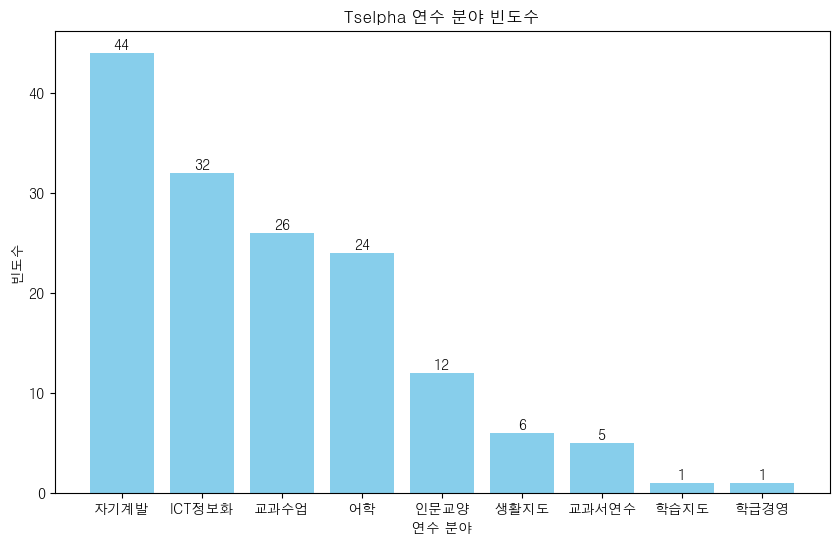

In [8]:
# '연수 분야' 값의 빈도 계산
value_counts = ts['연수 분야'].value_counts()

# 그래프 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='skyblue')

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, yval, ha='center', va='bottom')

# 제목 및 레이블 설정
plt.title('Tselpha 연수 분야 빈도수')
plt.xlabel('연수 분야')
plt.ylabel('빈도수')

# 그래프 출력
plt.show()

In [9]:
ts['제목'].value_counts()

제목
학급경영, 수업, 업무 - 노션으로 한 방에 해결하기           9
쉽게 시작할 수 있는 노션과 ZOOM 활용 꿀팁!             8
세상에서 제일 쉬운 과학 이야기                       6
지리와 함께하는 인문학 티타임                        6
교사가 알고싶은 독립운동사                          6
손그림과 파워포인트로 교실 속 콘텐츠 만들기                6
쉽게 배우고 활용하는 교실 속 손그림 그리기                5
메이슨의 Travel English                     5
English Grammar in Use 2                5
기후 변화 이야기, 교실에 오다                       5
행복한 학급 만들기, 학생과 교사 자존감 수업               4
수업을 살리는 체육 레시피                          4
학생들과 함께 나누는 기후변화 이야기                    4
성호쌤과 함께하는 랜선 박물관 여행                     4
저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년)    3
기초영어 회화 핵심표현 Real Speaking              3
초등학생 탐구생활                               3
수업을 살리는 놀이 레시피                          3
7인의 전문의와 함께하는 메디컬 콘서트                   3
교과수업에 활용하는 진로교육                         3
나도 할 수 있다! 현장연구와 SPSS                   3
그림검사와 다양한 기법으로 만나는 미술치료                 3
하루 20분, 컬쳐 리스닝 픽업                       2
옆반 쌤이 알려주는 꿀팁(실시간 쌍방향 수업편)     

In [10]:
ts[ts['제목'] == '학급경영, 수업, 업무 - 노션으로 한 방에 해결하기']['리뷰내용']

112    가을에 연수를 듣고, 간단한 기능만 활용했다가 아무래도 학기 중이라 내가 따라가기 ...
123    노션이라는 새로운 도구를 알게 되어서 좋았습니다. 노션에 익숙해 지면 업무 효율이 ...
127    노션이 다양한 방면에서 활용이 많이 되고, 실제 업무에도 적용하는 분들을 보면서 노...
130    목소리가 편안하고 설명이 명료해서 듣기 편했어요.\n두 선생님 모두 교육에 진심이신...
133    너무나 많은 앱들이 있어 사용하기가 버거웠는데, 이제 노션으로 정착해서 내 일과와 ...
134                         업무에도 하나씩 활용해 보니 효율성이 좋아졌습니다.
143    현장에서 실제 적용해보기 위한 여러 시도를 해보게 되었던 시간이었습니다. 연수를 통...
146    노션의 활용방법에서 기본적인 세팅 외에 업무적으로 현장에서 어떻게 활용할 수 있을지...
154    노션에 대해 궁금하지만 접근이 어려웠습니다.\n\n배우고 싶지만 기회가 없었는데 이...
Name: 리뷰내용, dtype: object

In [11]:
review_content = ts[ts['제목'] == '학급경영, 수업, 업무 - 노션으로 한 방에 해결하기']['리뷰내용']

# pandas의 텍스트 출력 옵션 조정
pd.set_option('display.max_colwidth', None)  # 열 너비를 자동으로 조정하여 전체 내용 표시

# 리뷰내용 출력
print(review_content.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    가을에 연수를 듣고, 간단한 기능만 활용했다가 아무래도 학기 중이라 내가 따라가기 벅찼던 것 같아서 방학 중에 복습을 하고 있다.\n\n하지만 연수가 진행될수록 답답함을 느낀 부분이 있다.\n\n1. 강의 버전과 현재 노션 버전이 다르다.\n2. 수식 입력을 할 때 강의에서 설명이 부족하다. 강의대로 했지만 계속 오류남. (입력 안되는 문자라고 뜸)\n3. 예시 페이지가 현실적으로 유용한지에 대한 의문\n\n노션을 활용하기 위해 연수를 들은 건데, 이 연수를 위해 따로 유튜브 등의 자료를 찾아야 하는 에너지가 발생했다.\n\n노션의 기본적인 기능 습득은 가능하지만 그 정도는 이 연수를 듣기 전에 유튜브로 예습을 했기 때문에 기대한 만큼의 연수는 아니었다.
                                                                 

In [12]:
ts[ts['제목'] == '학급경영, 수업, 업무 - 노션으로 한 방에 해결하기']

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수 분야,가격,대상
112,112,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2024.01.23,3,다소 벅찬 연수,"가을에 연수를 듣고, 간단한 기능만 활용했다가 아무래도 학기 중이라 내가 따라가기 벅찼던 것 같아서 방학 중에 복습을 하고 있다.\n\n하지만 연수가 진행될수록 답답함을 느낀 부분이 있다.\n\n1. 강의 버전과 현재 노션 버전이 다르다.\n2. 수식 입력을 할 때 강의에서 설명이 부족하다. 강의대로 했지만 계속 오류남. (입력 안되는 문자라고 뜸)\n3. 예시 페이지가 현실적으로 유용한지에 대한 의문\n\n노션을 활용하기 위해 연수를 들은 건데, 이 연수를 위해 따로 유튜브 등의 자료를 찾아야 하는 에너지가 발생했다.\n\n노션의 기본적인 기능 습득은 가능하지만 그 정도는 이 연수를 듣기 전에 유튜브로 예습을 했기 때문에 기대한 만큼의 연수는 아니었다.",ICT정보화,"40,000 원",초등 중등 교육전문직 일반
123,123,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2024.01.10,4,스스로 학습하게 하는 연수,"노션이라는 새로운 도구를 알게 되어서 좋았습니다. 노션에 익숙해 지면 업무 효율이 높아지고 주변 정리가 용이해 질 것 같습니다. 다만, 노션의 다양한 기능을 숙지하는 것은 스스로 할 수 밖에 없는 것 같습니다.",ICT정보화,"40,000 원",초등 중등 교육전문직 일반
127,127,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.30,4,"노션과 친해지고, 노션에 대해 더 알고 싶어지는 강의 :)","노션이 다양한 방면에서 활용이 많이 되고, 실제 업무에도 적용하는 분들을 보면서 노션에 호기심이 생겼습니다.\n사실 교무수첩, 다이어리 템플릿이 많이 공유되고 있어 크게 어렵다고 생각하지 않았었는데 막상 템플릿을 사용하려다 보니 기초가 없으면 원하는 방향으로 수정/사용이 어렵다는 걸 느꼈고 그래서 연수를 신청하게 되었습니다.\n철저히 노션 초보자의 입장에서 느낀 점을 정리해보았습니다 :)\n\n[장점]\n- 실제 활용 사례를 자세히 소개\n- 차분하고 친절한 설명, pc화면과 태블릿을 비교해서 설명\n\n[단점]\n- 현재 버전과 차이가 있어 노션 초보자가 따라가기에 다소 벅참\n- 사례를 중심으로 한 강이 구성되다 보니 노션의 기능을 이해한다기 보다는 따라서 만들게 되어 추후 수정/응용하고 싶은 경우 가능할지 모르겠음\n- 수식 등이 다소 난해해서 한숨이 나오기도 함 ㅎ__ㅎ\n\n나름 태블릿이나 여러 프로그램을 배우는데 익숙하다고 생각했는데 이 강의는 설명해주신 부분 외에 개인적으로 만들고 싶은 페이지 구성은 다소 어렵다는 생각이 들었습니다. 노션을 처음 접하는 분들보다는 노션을 한두번이라도 사용해보신 분들이 들으면 더욱 좋을 것 같습니다. 조금 쉽게 따라가기 위해 '2023 버전에서는 이 버튼을 눌러주세요' 등의 간단한 자막이 추가되면 좋겠습니다.\n그래도 선생님 두 분의 차분한 설명과 적절한 질문, 친절한 답변 등이 하나하나 따라해서 대시보드를 완성하는데 큰 힘이 되었고 선생님께서 구성하신 업무/학급 페이지는 정말 저를 되돌아보게 하셨습니다. 저도 저만의 노션 페이지를 더 알차게 꾸며서 업무도 개인 생활도 잘 정리하고 싶다는 욕심이 생겼습니다. 그래서 정말 다른 강의도 찾아보며 노션을 더 공부하고 있고, 이번 겨울방학 때 저만의 노션 페이지를 완성해서 실제 삶에 녹여보는 것이 이번 방학 목표가 되었습니다. 좋은 강의 해주셔서 고맙습니다!",ICT정보화,"40,000 원",초등 중등 교육전문직 일반
130,130,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.26,5,신문물 발빠르게 연수 해주셔서 감사합니다.,목소리가 편안하고 설명이 명료해서 듣기 편했어요.\n두 선생님 모두 교육에 진심이신것 같아 태도에도 마음이 움직였습니다.,ICT정보화,"40,000 원",초등 중등 교육전문직 일반
133,133,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.25,4,새로운 세계를 접한 연수,"너무나 많은 앱들이 있어 사용하기가 버거웠는데, 이제 노션으로 정착해서 내 일과와 수업을 정리해 볼수 있을것같고, 다른 것들과도 융합해 사용할 수 있을것같습니다. 다만 새로운 버젼에 맞게 강의가 만들어지면 좋겠습니다. 좋은 연수가 그런 부분을 따라가지 못해 그저그런 연수가 될까봐 아쉽네요",ICT정보화,"40,000 원",초등 중등 교육전문직 일반
134,134,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.25,5,직접적인 도움이 되었던 연수,업무에도 하나씩 활용해 보니 효율성이 좋아졌습니다.,ICT정보화,"40,000 원",초등 중등 교육전문직 일반
143,143,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.19,5,정말 도움이 많이 되었습니다.,현장에서 실제 적용해보기 위한 여러 시도를 해보게 되었던 시간이었습니다. 연수를 통해 많은 도움이 되었습니다. 고맙습니다.,ICT정보화,"40,000 원",초등 중등 교육전문직 일반
146,146,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.18,5,노션을 업무적으로 어떻게 활용하면 좋을지 고민이었는데,노션의 활용방법에서 기본적인 세팅 외에 업무적으로 현장에서 어떻게 활용할 수 있을지를 고민했는데 연수를 따라가면서 기본값이 설정되어 좋습니다.,ICT정보화,"40,000 원",초등 중등 교육전문직 일반
154,154,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.13,5,노션에 대해 알아보는 시간,노션에 대해 궁금하지만 접근이 어려웠습니다.\n\n배우고 싶지만 기회가 없었는데 이번 연수를 통해서 기본적인 개념과 사용에 대해서 알 수 있었습니다.\n\n추가로 더 심화 실습 연수도 제작해주시면 감사하겠습니다.,ICT정보화,"40,000 원",초등 중등 교육전문직 일반


##### 강의 제목에 따른 정리

In [13]:
# 제목의 유니크 개수 확인
unique_titles = ts['제목'].unique()
unique_title_count = len(unique_titles)

print(f"제목의 유니크 개수: {unique_title_count}")


제목의 유니크 개수: 60


In [14]:
# 그룹화하여 제목별로 연수 분야, 시간, 가격, 대상 컬럼의 정보를 얻음
title_info = ts.groupby('제목').agg({
    '연수 분야': 'first',  # 제목별로 첫 번째 연수 분야
    '시간': 'first',       # 제목별로 첫 번째 시간
    '가격': 'first',       # 제목별로 첫 번째 가격
    '대상': 'first'        # 제목별로 첫 번째 대상
}).reset_index()

In [15]:
print("\n각 제목에 따른 연수 분야, 시간, 가격, 대상:")
title_info


각 제목에 따른 연수 분야, 시간, 가격, 대상:


,제목,연수 분야,시간,가격,대상
0,7인의 전문의와 함께하는 메디컬 콘서트,인문교양,30시간,"70,000 원",전체
1,English Grammar in Use 2,어학,30시간,"70,000 원",전체
2,SNS 잉글리시 톡,None,30시간,None,None
3,강의의 품격,자기계발,30시간,"70,000 원",전체
4,같이 읽고 함께 나누는 독서수업방법,학습지도,30시간,"70,000 원",초등 중등
5,교과서 속 세계문화유산,교과수업,30시간,"70,000 원",전체
6,교과수업에 활용하는 진로교육,교과수업,30시간,"70,000 원",초등 중등 교육전문직
7,교사 자존감 수업,자기계발,15시간,"40,000 원",전체
8,교사가 알고싶은 독립운동사,교과수업,20시간,100%할인\n0 원,전체
9,교사를 위한 교실 밖 여행인문학,인문교양,15시간,"40,000 원",전체


### 별점 이진화

In [16]:
ts['별점_이진화'] = ts['별점'].apply(lambda x: 1 if x == 5 else 0)

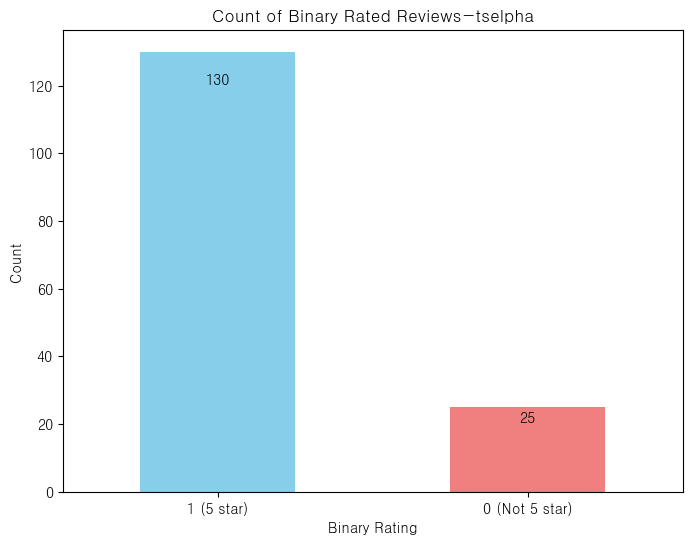

In [17]:
binary_counts = ts['별점_이진화'].value_counts()

plt.figure(figsize=(8, 6))

ax = binary_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# 막대 위에 개수 표시
for i, count in enumerate(binary_counts):
    ax.text(i, count - 0.05 * count, str(count), ha='center', va='top')
    
binary_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Count of Binary Rated Reviews-tselpha')
plt.xlabel('Binary Rating')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['1 (5 star)', '0 (Not 5 star)'], rotation=0)
plt.show()

In [18]:
ts

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수 분야,가격,대상,별점_이진화
0,0,수업을 살리는 체육 레시피,30시간,2024.06.13,5,오늘부터는 내가 체육 교담!!!,아이들이 정~~~말 좋아하는 체육을 더 더 즐겁게 해주기 위한 선생님의 노력!!\n\n우리 반 친구들아~ 선생님의 노력을 안다면 내일부터는 말 좀 더 잘 듣기!!! ^^\n\n아이들과의 즐거운 시간을 위한 체육 꿀팁이 가득 가득!!\n\n연수 어느 부분 하나 버릴게 없는 꿀단지네요~\n\n활용도 1000000000000000 ^^\n\n체육에 자신없는 저와 같은 선생님들께 강추합니다~~,교과수업,"70,000 원",유치 초등 교육전문직 일반,1
1,1,교사를 위한 교실 밖 여행인문학,15시간,2024.06.10,5,올 여름방학 여행은 이 연수를 보고 결정했어요,"저는 여행에 관심이 많은 교사입니다. 학기중 바쁜 일정으로 여행은 꿈도 꾸기 어렵더라구요. 그래서 방학을 더 기다리는 줄도 모르겠어요. 이 연수에서 소개하는 관광지 중 가본 곳도 많지만 그렇지 않은 곳도 있었고. 새로운 여행지가 개발돼 소개를 해 주니 다시 한번 가보고 싶은 충동이 생기더라구요. 더군다나 맛있은 음식을 소개해 주어 '금강산도 식후경'이라는 말이 있듯 입도 즐거운 여행이 될 것 같습니다. 보는 것에 그치지 않고 역사, 위치 등등 전반적인 소개 자료가 수록돼 있어 공부하는 느낌이 팍팍 드는 그런 연수였습니다. 다른 분께도 소개해 드리고 싶네요. 좋은 연수 감사합니다.",인문교양,"40,000 원",전체,1
2,2,왕초보를 위한 캘리그래피,15시간,2024.06.10,5,왕초보도 할수 있다!! 캘리그래피,"미술시간에 아이들과 캘리그라피 해봤었는데,이렇게 자세히 알려주는 강의를 듣기는 처음이에요\n잘 사용할 수 있을 것 같습니다.",자기계발,"40,000 원",전체,1
3,3,그림검사와 다양한 기법으로 만나는 미술치료,30시간,2024.06.07,5,유용한 연수예요!,"학생들이 감정이나 내면세계를 미술 활동을 통해 표현하므로 학생 내면에 대해 알고, 학생의 감정적 스트레스를 완화시키는 데에 본 연수가 유익했다고 생각합니다.",자기계발,"70,000 원",전체,1
4,4,같이 읽고 함께 나누는 독서수업방법,30시간,2024.06.06,5,유익한 후기,"워낙 독서토론 분야에서 유명하신 김성현 선생님 강의가 티셀파에서 오픈되어서 바로 들었습니다.\n책도 사서 읽었었는데, 이번 강의도 책읽기 지도법에 대해서 배울수 있어서 유익한 강의였습니다.",학습지도,"70,000 원",초등 중등,1
...,...,...,...,...,...,...,...,...,...,...,...
150,150,일본어 마스터 2,30시간,2023.12.14,5,쉽고 재미있게 학습할 수 있었습니다.,유용한 표현을 쉽고 재미있게 학습할 수 있어서 유익한 시간이었습니다.,어학,"70,000 원",전체,1
151,151,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2023.12.13,5,요즘같은 환경에 필요한 연수!,"코로나 시대를 겪으며 마스크가 일상화 되었고 특히나 학교현장에서는 질병에 더 취약하여 메디컬 콘서트 연수를 들으면서 시간가는 줄 몰랐다.\n학생들이 자주 걸리는 결막염부터 인공눈물, 알레르기 비염, 환절기 감기, 특히나 학기초에 교사들이 고생하는 갑자기 쉬어버리는 목소리 이야기는 너무도 흥미있는 내용이였다. 요즈음 학생들이 너도 나도 사용하는 이어폰 사용법도 재미있었고 화장품을 무분별하게 사용하는 학생들에게 이야기해주기 쉬운 여드름, 미백, 자외선 차단제는 수업에서 이야기하기 너무도 쉬운 소재의 강의였다. 여성들이 관심 있을 월경, 유방암 부터 모든 사람들이 관심이있는 다이어트와 우선 먹고보는 종합비타민 이야기는 연수를 들으면서도 신기하다! 생각하며 재미있게 들을 수 있는 소재였다.\n연수라고 생각이 들지 않을 만큼 요즘 시대, 환경에 딱 맞춤형 내용이라 적극 추천하고 싶은 부분이다!",인문교양,"70,000 원",전체,1
152,152,성호쌤과 함께하는 랜선 박물관 여행,30시간,2023.12.13,5,수업에 활용 가능한 연수!,학생들과 수업하다보면 다양한 활동들을 해야하고 연관되어 있는 미디어도 많은데 랜선 박물관 여행 덕분에 수업과정에서 활용할 수 있는 정보가 너무 많아 좋았어요!!! 생각하지 못했던 내용도 알 수 있었고 랜선이였지만 방학동안 꼭 가보고 싶은 계획이 생겼습니다^^\n연수동안 지루하지 않고 재미있는 한권의 책을 읽고 여행을 다니는 기분으로 시간을 보낼 수 있어서 힐링이였네요~,자기계발,"70,000 원",초등 중등 교육전문직 일반,1
153,153,저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년),5시간,2023.12.13,5,유용한 교과서 활용 연수,잘 들었습니다~ 연수를 들으니 확실히 교과서에 대한 이해도가 높아졌습니다.,교과서연수,100%할인\n0 원,유치 초등,1


### 텍스트 분석

In [19]:
# Okt 형태소 분석기 사용
okt = Okt()

# 품사 태그 딕셔너리 초기화
pos_dict = {tag: 0 for tag in okt.tagset.keys()}

# 품사별 형태소 수집용 리스트
punctuations = []
foreign = []
determiners = []
conjunctions = []
alphas = []
exclamations = []
korean_particles = []
numbers = []
josa = []
suffix = []
adverb = []
adjective = []
verb = []
noun = []
emoi = []

# 상위 1000개 후기에서 품사 빈도 계산 및 형태소 수집
for doc in ts['리뷰내용'][:1000]:
    doc_pos = okt.pos(str(doc))
    for word, pos in doc_pos:
        if pos in pos_dict:
            pos_dict[pos] += 1
            if pos == 'Punctuation':
                punctuations.append(word)
            elif pos == 'Foreign':
                foreign.append(word)
            elif pos == 'Determiner':
                determiners.append(word)
            elif pos == 'Conjunction':
                conjunctions.append(word)
            elif pos == 'Alpha':
                alphas.append(word)
            elif pos == 'Exclamation':
                exclamations.append(word)
            elif pos == 'KoreanParticle':
                korean_particles.append(word)
            elif pos == 'Number':
                numbers.append(word)
            elif pos == 'Josa':
                josa.append(word)
            elif pos == 'Suffix':
                suffix.append(word)
            elif pos == 'Adverb':
                adverb.append(word)
            elif pos == 'Adjective':
                adjective.append(word)
            elif pos == 'Verb':
                verb.append(word)
            elif pos == 'Noun':
                noun.append(word)
            elif pos == 'Emoi':
                emoi.append(word)
                

# 품사 빈도 출력
print("품사 빈도:", pos_dict)

품사 빈도: {'Adjective': 862, 'Adverb': 162, 'Alpha': 27, 'Conjunction': 22, 'Determiner': 12, 'Eomi': 2, 'Exclamation': 4, 'Foreign': 174, 'Hashtag': 0, 'Josa': 1773, 'KoreanParticle': 7, 'Noun': 3739, 'Number': 26, 'PreEomi': 0, 'Punctuation': 661, 'ScreenName': 0, 'Suffix': 216, 'Unknown': 0, 'Verb': 1387}


In [20]:
print("Available POS Tags in Okt:")
print(okt.tagset)

Available POS Tags in Okt:
{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


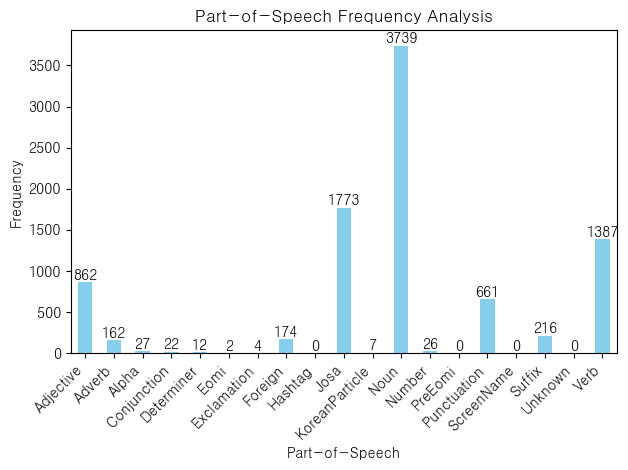

In [21]:
# 데이터프레임 생성 및 그래프 그리기
df = pd.DataFrame(list(pos_dict.items()), columns=['Part-of-Speech', 'Frequency'])
ax = df.plot.bar(x='Part-of-Speech', y='Frequency', legend=False, color='skyblue')

# 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('Part-of-Speech')
plt.ylabel('Frequency')
plt.title('Part-of-Speech Frequency Analysis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [22]:
import random


# 품사별 예시 단어 리스트 생성 함수 (중복 제거)
def get_pos_samples(pos_list, pos_name):
    unique_words = list(set(pos_list))  # 중복 제거
    if len(unique_words) > 0:
        samples = random.sample(unique_words, min(5, len(unique_words)))
    else:
        samples = []
    return pd.DataFrame({pos_name: samples})
    
# 각 품사별 예시 단어 데이터프레임 생성
punctuations_df = get_pos_samples(punctuations, 'Punctuation')
foreign_df = get_pos_samples(foreign, 'Foreign')
determiners_df = get_pos_samples(determiners, 'Determiner')
conjunctions_df = get_pos_samples(conjunctions, 'Conjunction')
alphas_df = get_pos_samples(alphas, 'Alpha')
exclamations_df = get_pos_samples(exclamations, 'Exclamation')
korean_particles_df = get_pos_samples(korean_particles, 'KoreanParticle')
numbers_df = get_pos_samples(numbers, 'Number')
josa_df = get_pos_samples(josa, 'Josa')
suffix_df = get_pos_samples(suffix, 'Suffix')
adverb_df = get_pos_samples(adverb, 'Adverb')
adjective_df = get_pos_samples(adjective, 'Adjective')
verb_df = get_pos_samples(verb, 'Verb')
emoi_df = get_pos_samples(emoi, 'Emoi')
noun_df = get_pos_samples(noun, 'Noun')

# 데이터프레임 병합
pos_samples_df = pd.concat([punctuations_df, foreign_df, determiners_df, conjunctions_df, alphas_df, 
                            exclamations_df, korean_particles_df, numbers_df, josa_df, suffix_df, 
                            adverb_df, adjective_df, verb_df, emoi_df, noun_df], axis=1)

transposed_df = pos_samples_df.T

In [23]:
transposed_df

,0,1,2,3,4
Punctuation,...',:)),",.",!!,","
Foreign,\n\n\n,\n\n,♥♥♥♥♥,\n\n\n\n,\n
Determiner,한,그,이,내,저
Conjunction,그런데,그리고,하지만,그러기에,그렇다고
Alpha,you,his,way,TED,did
Exclamation,아,우와,NaN,NaN,NaN
KoreanParticle,ㅎㅎ,ㅠㅠ,ㅎ,NaN,NaN
Number,3,2024,2,30,20분
Josa,에요,이라도,지만,에게,이라서
Suffix,원,분들,씩,간,님


### 리뷰내용 전처리

In [24]:
okt = Okt()

# 특정 품사 리스트 정의
unwanted_pos = ['Adverb', 'Alpha', 'Counjunction', 'Determiner', 'Emoi' ,'Exclamation', 'Foreign',
                'Josa', 'Noun','Punctuation' , 'Suffix' ,'Verb', 'KoreanParticle']

# 불용어 리스트
stopwords = ['되어다', '연수', '있다', '오랜', '어쩔', '어느', '을', '이다', '다', '네', '아', '니', '가', '하지만'
             '님', '의', '가', '이', '은', '는', '에', '를', '으로', '도', '은', '로', '한', 
             '그리고', '또한', '하다', '되다', '이다', '고', '까지', '에서', '만', '밖에', '때문',
             '위해', '처럼', '안', '속', '사람', '중', '좀','들','같다','좋다', '들다', '자다', '많다', '재미있다', '아니다','없다']

In [25]:
def preprocess_text(text):
    # 특수문자 및 영어 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 형태소 분석 및 불용어 제거
    words = okt.pos(text, stem=True)  # 형태소 분석
    words = [word for word, pos in words if word not in stopwords and pos not in unwanted_pos]  # 불용어 및 특정 품사 제거
    
    return ' '.join(words)

In [26]:
# 후기 칼럼 전처리
ts['리뷰내용_전처리'] = ts['리뷰내용'].apply(preprocess_text)

In [27]:
ts

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수 분야,가격,대상,별점_이진화,리뷰내용_전처리
0,0,수업을 살리는 체육 레시피,30시간,2024.06.13,5,오늘부터는 내가 체육 교담!!!,아이들이 정~~~말 좋아하는 체육을 더 더 즐겁게 해주기 위한 선생님의 노력!!\n\n우리 반 친구들아~ 선생님의 노력을 안다면 내일부터는 말 좀 더 잘 듣기!!! ^^\n\n아이들과의 즐거운 시간을 위한 체육 꿀팁이 가득 가득!!\n\n연수 어느 부분 하나 버릴게 없는 꿀단지네요~\n\n활용도 1000000000000000 ^^\n\n체육에 자신없는 저와 같은 선생님들께 강추합니다~~,교과수업,"70,000 원",유치 초등 교육전문직 일반,1,좋아하다 즐겁다 즐겁다 추하다
1,1,교사를 위한 교실 밖 여행인문학,15시간,2024.06.10,5,올 여름방학 여행은 이 연수를 보고 결정했어요,"저는 여행에 관심이 많은 교사입니다. 학기중 바쁜 일정으로 여행은 꿈도 꾸기 어렵더라구요. 그래서 방학을 더 기다리는 줄도 모르겠어요. 이 연수에서 소개하는 관광지 중 가본 곳도 많지만 그렇지 않은 곳도 있었고. 새로운 여행지가 개발돼 소개를 해 주니 다시 한번 가보고 싶은 충동이 생기더라구요. 더군다나 맛있은 음식을 소개해 주어 '금강산도 식후경'이라는 말이 있듯 입도 즐거운 여행이 될 것 같습니다. 보는 것에 그치지 않고 역사, 위치 등등 전반적인 소개 자료가 수록돼 있어 공부하는 느낌이 팍팍 드는 그런 연수였습니다. 다른 분께도 소개해 드리고 싶네요. 좋은 연수 감사합니다.",인문교양,"40,000 원",전체,1,바쁘다 어렵다 그렇다 새롭다 맛있다 즐겁다 그렇다
2,2,왕초보를 위한 캘리그래피,15시간,2024.06.10,5,왕초보도 할수 있다!! 캘리그래피,"미술시간에 아이들과 캘리그라피 해봤었는데,이렇게 자세히 알려주는 강의를 듣기는 처음이에요\n잘 사용할 수 있을 것 같습니다.",자기계발,"40,000 원",전체,1,자세하다
3,3,그림검사와 다양한 기법으로 만나는 미술치료,30시간,2024.06.07,5,유용한 연수예요!,"학생들이 감정이나 내면세계를 미술 활동을 통해 표현하므로 학생 내면에 대해 알고, 학생의 감정적 스트레스를 완화시키는 데에 본 연수가 유익했다고 생각합니다.",자기계발,"70,000 원",전체,1,유익하다
4,4,같이 읽고 함께 나누는 독서수업방법,30시간,2024.06.06,5,유익한 후기,"워낙 독서토론 분야에서 유명하신 김성현 선생님 강의가 티셀파에서 오픈되어서 바로 들었습니다.\n책도 사서 읽었었는데, 이번 강의도 책읽기 지도법에 대해서 배울수 있어서 유익한 강의였습니다.",학습지도,"70,000 원",초등 중등,1,유명하다 지 유익하다
...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,일본어 마스터 2,30시간,2023.12.14,5,쉽고 재미있게 학습할 수 있었습니다.,유용한 표현을 쉽고 재미있게 학습할 수 있어서 유익한 시간이었습니다.,어학,"70,000 원",전체,1,유용하다 유익하다
151,151,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2023.12.13,5,요즘같은 환경에 필요한 연수!,"코로나 시대를 겪으며 마스크가 일상화 되었고 특히나 학교현장에서는 질병에 더 취약하여 메디컬 콘서트 연수를 들으면서 시간가는 줄 몰랐다.\n학생들이 자주 걸리는 결막염부터 인공눈물, 알레르기 비염, 환절기 감기, 특히나 학기초에 교사들이 고생하는 갑자기 쉬어버리는 목소리 이야기는 너무도 흥미있는 내용이였다. 요즈음 학생들이 너도 나도 사용하는 이어폰 사용법도 재미있었고 화장품을 무분별하게 사용하는 학생들에게 이야기해주기 쉬운 여드름, 미백, 자외선 차단제는 수업에서 이야기하기 너무도 쉬운 소재의 강의였다. 여성들이 관심 있을 월경, 유방암 부터 모든 사람들이 관심이있는 다이어트와 우선 먹고보는 종합비타민 이야기는 연수를 들으면서도 신기하다! 생각하며 재미있게 들을 수 있는 소재였다.\n연수라고 생각이 들지 않을 만큼 요즘 시대, 환경에 딱 맞춤형 내용이라 적극 추천하고 싶은 부분이다!",인문교양,"70,000 원",전체,1,쉽다 쉽다 신기하다
152,152,성호쌤과 함께하는 랜선 박물관 여행,30시간,2023.12.13,5,수업에 활용 가능한 연수!,학생들과 수업하다보면 다양한 활동들을 해야하고 연관되어 있는 미디어도 많은데 랜선 박물관 여행 덕분에 수업과정에서 활용할 수 있는 정보가 너무 많아 좋았어요!!! 생각하지 못했던 내용도 알 수 있었고 랜선이였지만 방학동안 꼭 가보고 싶은 계획이 생겼습니다^^\n연수동안 지루하지 않고 재미있는 한권의 책을 읽고 여행을 다니는 기분으로 시간을 보낼 수 있어서 힐링이였네요~,자기계발,"70,000 원",초등 중등 교육전문직 일반,1,다양하다 못 지루하다
153,153,저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년),5시간,2023.12.13,5,유용한 교과서 활용 연수,잘 들었습니다~ 연수를 들으니 확실히 교과서에 대한 이해도가 높아졌습니다.,교과서연수,100%할인\n0 원,유치 초등,1,확실하다


In [28]:
ts['리뷰내용'][100]

'연수 내용과 함께 실제 교실 환경에서 소개된 활동을 영상으로 확인할 수 있어서 무척 유익했습니다. 활용에 참여한 학생들의 생생한 자기 생각도 알게 되어 인상적이었구요. 이 연수를 듣고 처음에는 무작정 레시피에 따라 따라해 보는 것이 좋겠다는 생각이 듭니다. 이후에 우리 학교와 학급의 여건과 특성에 따라 기존 레시피에 간을 더하거나 부가재료를 추가하여 우리 학급에 딱 맞는 맞춤형 나만의 레시피가 완성될 수 있을 거라는 기대도 하게 되네요. 유익한 연수 감사합니다.'

In [29]:
ts['리뷰내용_전처리'][100]

'유익하다 생생하다 더하다 유익하다'

### 긍정 그룹과 부정 그룹으로 나누기 + 빈도수 + word cloud

In [30]:
# 긍정 그룹과 부정 그룹으로 나누기
positive_reviews = ts[ts['별점_이진화'] == 1]['리뷰내용_전처리']
negative_reviews = ts[ts['별점_이진화'] == 0]['리뷰내용_전처리']

In [31]:
positive_reviews

0                 좋아하다 즐겁다 즐겁다 추하다
1      바쁘다 어렵다 그렇다 새롭다 맛있다 즐겁다 그렇다
2                             자세하다
3                             유익하다
4                      유명하다 지 유익하다
                  ...             
150                      유용하다 유익하다
151                     쉽다 쉽다 신기하다
152                    다양하다 못 지루하다
153                           확실하다
154                       궁금하다 어렵다
Name: 리뷰내용_전처리, Length: 130, dtype: object

In [32]:
negative_reviews

21                                                         피곤하다 그렇다 문 제 즐겁다 신기하다 다양하다 지루하다 유익하다 제
41                                                                                        빠르다 가볍다
51                                                                                   알맞다 적합하다 어렵다
52                                                                                            어렵다
62                                                                                 솔직하다 하지만 어렵다 못
64                                                                                            어렵다
76                                                                                               
82                                                                                            아쉽다
89                                                        편하다 유용하다 아프다 하지만 불편하다 놀래다 안되다 슬프다 부탁드리다
91                                                                                       어렵다 유익하다
93                  

In [33]:
# CountVectorizer를 사용하여 단어 빈도 계산
def get_word_frequencies(reviews):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(reviews)
    frequencies = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    return pd.DataFrame(frequencies, index=words, columns=['frequency']).sort_values(by='frequency', ascending=False)

# 긍정 그룹 단어 빈도
positive_word_frequencies = get_word_frequencies(positive_reviews)
# 부정 그룹 단어 빈도
negative_word_frequencies = get_word_frequencies(negative_reviews)

In [34]:
print("Positive Word Frequencies:\n", positive_word_frequencies)
print("Negative Word Frequencies:\n", negative_word_frequencies)

Positive Word Frequencies:
       frequency
다양하다         25
유익하다         22
어떻다          17
좋아하다          9
유용하다          8
...         ...
슬프다           1
숭고하다          1
솔직하다          1
든든하다          1
신기하다          1

[128 rows x 1 columns]
Negative Word Frequencies:
        frequency
어렵다           10
아쉽다            5
하지만            5
그렇다            4
다양하다           4
안되다            3
가능하다           3
간단하다           3
불편하다           2
자세하다           2
빠르다            2
익숙하다           2
유익하다           2
벅차다            2
유용하다           2
원하다            2
차분하다           2
답답하다           2
친절하다           2
기대하다           2
알차다            2
오래되다           2
새롭다            2
용이하다           1
이런저런           1
그런             1
재밌다            1
어색하다           1
적절하다           1
적합하다           1
즐겁다            1
지루하다           1
철저하다           1
편하다            1
피곤하다           1
한두             1
여러             1
알맞다            1
건데             1
어떡하다           1
꾸준하다           1
난해하다          

In [35]:
positive_reviews

0                 좋아하다 즐겁다 즐겁다 추하다
1      바쁘다 어렵다 그렇다 새롭다 맛있다 즐겁다 그렇다
2                             자세하다
3                             유익하다
4                      유명하다 지 유익하다
                  ...             
150                      유용하다 유익하다
151                     쉽다 쉽다 신기하다
152                    다양하다 못 지루하다
153                           확실하다
154                       궁금하다 어렵다
Name: 리뷰내용_전처리, Length: 130, dtype: object

#### 어렵다 단어 포함 리뷰

In [36]:
# '어렵다' 단어가 포함된 행 번호 추출
difficult_reviews_indices = positive_reviews[positive_reviews.str.contains('어렵다', na=False)].index

# '어렵다' 단어가 포함된 행 번호 출력
print("\n'어렵다' 단어가 포함된 행 번호:")
print(difficult_reviews_indices.tolist())


'어렵다' 단어가 포함된 행 번호:
[1, 6, 87, 138, 148, 154]


In [37]:
# 지정된 행 번호
indices = [1, 6, 87, 138, 148, 154]

# 지정된 행 번호의 '리뷰내용' 추출
selected_reviews = ts.loc[indices, '리뷰내용']

# pandas 출력 옵션 설정
pd.set_option('display.max_colwidth', None)

In [38]:
selected_reviews

1                                                                                                                                                                                                                                                                                           저는 여행에 관심이 많은 교사입니다. 학기중 바쁜 일정으로 여행은 꿈도 꾸기 어렵더라구요. 그래서 방학을 더 기다리는 줄도 모르겠어요. 이 연수에서 소개하는 관광지 중 가본 곳도 많지만 그렇지 않은 곳도 있었고. 새로운 여행지가 개발돼 소개를 해 주니 다시 한번 가보고 싶은 충동이 생기더라구요. 더군다나 맛있은 음식을 소개해 주어 '금강산도 식후경'이라는 말이 있듯 입도 즐거운 여행이 될 것 같습니다. 보는 것에 그치지 않고 역사, 위치 등등 전반적인 소개 자료가 수록돼 있어 공부하는 느낌이 팍팍 드는 그런 연수였습니다. 다른 분께도 소개해 드리고 싶네요. 좋은 연수 감사합니다.
6      제가 제작년 음악선생님과 칼림바 동아리를 하면서 이 악기의 매력에 푹 빠지게 되었습니다. 작고 귀여운 악기인데 소리는 너무 우아하고 아름답게 나기에 방과후 시간에 혼자 연습하며 힐링하곤 했습니다. 그러던 중 아이들과도 함께 연주하면 너무 좋겠다는 생각이 들어 칼림바동아리를 만들게 되었습니다. 간단한 곡들만 연주하다가 내가 더 많이 배워서 아이들에게 좋은 연주 기법을 알려줘야 겠다는 생각이 들어 이 연수를 신청하게 되었습니다. 제가 연수를 들으며 가장 좋았던 점은 뮤즈스코어에 대해 알게 된 것입니다. 책으로 된 악보만 사서 연주했었는데 뮤즈스코어라는 무료 악보프로그램을 알게 되어 잘 사용하고 있습니다. 단축키도 자세히 알려주셔서 너무너무 좋았습니다! 또한 슬라이드 주법 등 다

In [39]:
positive_word_frequencies

,frequency
다양하다,25
유익하다,22
어떻다,17
좋아하다,9
유용하다,8
...,...
슬프다,1
숭고하다,1
솔직하다,1
든든하다,1


In [40]:
# 상위 10개 단어 출력
print("긍정 그룹 상위 10개 단어:")
print(positive_word_frequencies.head(10))

긍정 그룹 상위 10개 단어:
      frequency
다양하다         25
유익하다         22
어떻다          17
좋아하다          9
유용하다          8
자세하다          7
즐겁다           7
필요하다          7
어렵다           6
행복하다          6


In [41]:
negative_reviews

21                                                         피곤하다 그렇다 문 제 즐겁다 신기하다 다양하다 지루하다 유익하다 제
41                                                                                        빠르다 가볍다
51                                                                                   알맞다 적합하다 어렵다
52                                                                                            어렵다
62                                                                                 솔직하다 하지만 어렵다 못
64                                                                                            어렵다
76                                                                                               
82                                                                                            아쉽다
89                                                        편하다 유용하다 아프다 하지만 불편하다 놀래다 안되다 슬프다 부탁드리다
91                                                                                       어렵다 유익하다
93                  

#### 어렵다 단어 포함 리뷰

In [42]:
# '어렵다' 단어가 포함된 행 번호 추출
difficult_reviews_indices = negative_reviews[negative_reviews.str.contains('어렵다', na=False)].index

In [43]:
# '어렵다' 단어가 포함된 행 번호 출력
print("\n'어렵다' 단어가 포함된 행 번호:")
print(difficult_reviews_indices.tolist())


'어렵다' 단어가 포함된 행 번호:
[51, 52, 62, 64, 91, 93, 124, 127]


In [44]:
# 지정된 행 번호
indices = [51, 52, 62, 64, 91, 93, 124, 127]

# 지정된 행 번호의 '리뷰내용' 추출
selected_reviews = ts.loc[indices, '리뷰내용']

# pandas 출력 옵션 설정
pd.set_option('display.max_colwidth', None)

In [45]:
selected_reviews

51                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               기본적으로 리스닝이 꽤 잘 되는 상태의 사람이 우리나라 문화를 더 알고 싶으면 듣기 알맞은 강의 입니다. 영어를 배울 용도로 강의를 듣기는 적합하지 않고 시험 문제도 주로 문화재에 대한 문제가 대부분이라 풀기 어려웠습니다.
52                                                        

In [46]:
negative_word_frequencies

,frequency
어렵다,10
아쉽다,5
하지만,5
그렇다,4
다양하다,4
안되다,3
가능하다,3
간단하다,3
불편하다,2
자세하다,2


In [47]:
print("\n부정 그룹 상위 10개 단어:")
print(negative_word_frequencies.head(10))


부정 그룹 상위 10개 단어:
      frequency
어렵다          10
아쉽다           5
하지만           5
그렇다           4
다양하다          4
안되다           3
가능하다          3
간단하다          3
불편하다          2
자세하다          2


In [48]:
# 상위 20개의 단어만 추출
top_positive_frequencies = positive_word_frequencies.head(20)
top_negative_frequencies = negative_word_frequencies.head(20)

In [49]:
# 폰트 경로 설정
font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF'  # 또는 폰트 파일의 경로를 지정합니다

def plot_wordcloud(frequencies, title):
    # WordCloud 객체 생성
    wc = WordCloud(width=1000, height=600, background_color='white', font_path=font_path)
    # 빈도 데이터를 이용하여 Word Cloud 생성
    wordcloud = wc.generate_from_frequencies(frequencies)
    
    # Word Cloud 시각화
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()


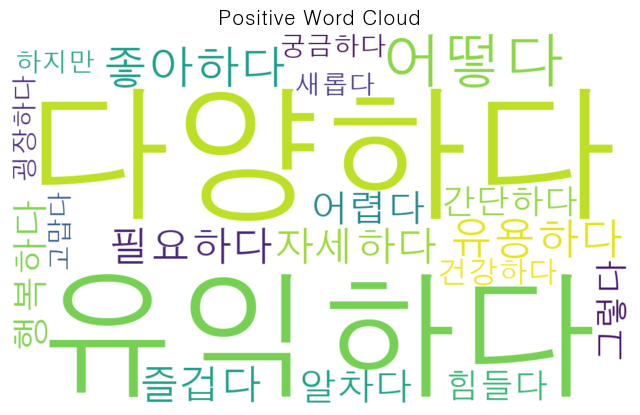

In [50]:
# 긍정 그룹 Word Cloud
plot_wordcloud(top_positive_frequencies['frequency'], 'Positive Word Cloud')

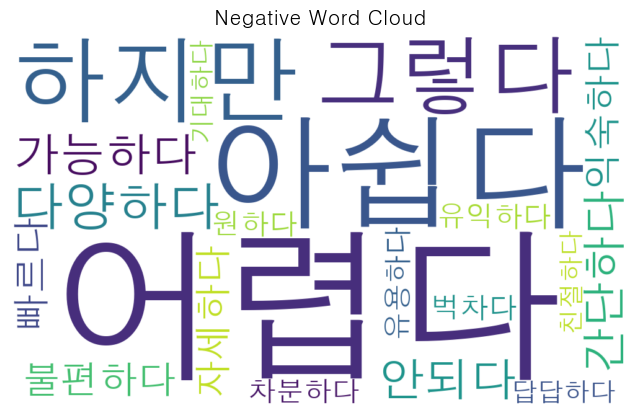

In [51]:
# 부정 그룹 Word Cloud
plot_wordcloud(top_negative_frequencies['frequency'], 'Negative Word Cloud')

### 별점 예측 모델

In [52]:
# 전처리된 후기와 이진화된 별점 준비
X = ts['리뷰내용_전처리']
y = ts['별점_이진화']

In [53]:
# NaN 값 제거
X = X.dropna()
y = y[X.index]

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=12345, 
                                                    shuffle=True, 
                                                    test_size=0.3)


In [55]:
# Tokenizer 초기화 및 피팅
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [56]:
# 텍스트를 시퀀스로 변환
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [57]:
# 시퀀스 패딩
max_length = 100
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=max_length)

In [58]:
# Train-validation split
X_train_pad, X_val_pad, y_train, y_val = train_test_split(X_train_pad, y_train, 
                                                           random_state=12345, 
                                                           shuffle=True, 
                                                           test_size=0.5)

In [59]:
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import class_weight

model = keras.models.Sequential([
    keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    keras.layers.LSTM(64, return_sequences=True),
    BatchNormalization(),  # 배치 정규화 추가
    keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.3),
    keras.layers.Dense(1, activation='sigmoid')
])
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 콜백 정의
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=4)
mc = keras.callbacks.ModelCheckpoint('./best_tsmodel.keras', monitor='val_accuracy', mode='max', save_best_only=True)

In [60]:
# 모델 학습
history = model.fit(
    X_train_pad, y_train, 
    epochs=30, 
    batch_size=32,  # 배치 크기 조정
    validation_data=(X_val_pad, y_val), 
    callbacks=[es, mc]
)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - accuracy: 0.9070 - loss: 0.6160 - val_accuracy: 0.7593 - val_loss: 0.6346
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9051 - loss: 0.4860 - val_accuracy: 0.7593 - val_loss: 0.5900
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8947 - loss: 0.4103 - val_accuracy: 0.7593 - val_loss: 0.5580
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8843 - loss: 0.3595 - val_accuracy: 0.7593 - val_loss: 0.5542
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8738 - loss: 0.3819 - val_accuracy: 0.7593 - val_loss: 0.5753
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8843 - loss: 0.3604 - val_accuracy: 0.7593 - val_loss: 0.6054
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9051 - loss: 0.3250 - val_accuracy: 0.7593 - val_loss: 0.6325
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8947 - loss: 0.3502 - val_accuracy: 0.7593 - val_loss: 0.6417

In [61]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8836 - loss: 0.3620
Test Loss: 0.3874
Test Accuracy: 0.8723


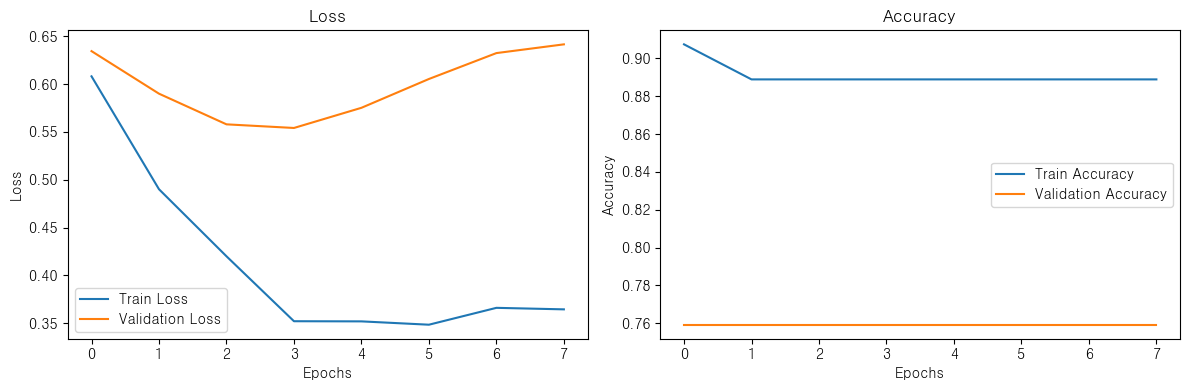

In [62]:
# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# Loss 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()